In [249]:
import pandas as pd
from pandas import read_csv
from datetime import datetime
import calendar
import matplotlib.pyplot as plt
from statistics import mean
from libs.ds_charts import get_variable_types, choose_grid, HEIGHT

In [250]:
df_tabular = read_csv('dataset_2/air_quality_tabular.csv')
df_tabular

,date,FID,City_EN,Prov_EN,GbCity,GbProv,Field_1,ALARM,CO_Mean,CO_Min,...,PM2.5_Max,PM2.5_Std,PM10_Mean,PM10_Min,PM10_Max,PM10_Std,SO2_Mean,SO2_Min,SO2_Max,SO2_Std
0,01/01/2020,0,Beijing,Beijing,1100,11,24.0,Safe,0.792917,0.60,...,48.0,7.618394,55.000000,38.0,86.0,14.044572,6.708333,3.0,12.0,2.440614
1,01/01/2020,1,Tianjin,Tianjin,1200,12,245.0,Safe,1.157083,0.71,...,78.0,12.203995,94.500000,64.0,123.0,17.327723,14.208333,9.0,20.0,3.054766
2,01/01/2020,2,Shijiazhuang,Hebei,1301,13,228.0,Safe,1.489167,1.17,...,95.0,13.515423,135.166667,114.0,168.0,15.249772,26.208333,22.0,33.0,2.676739
3,01/01/2020,3,Tangshan,Hebei,1302,13,244.0,Safe,1.882083,1.10,...,104.0,18.350324,133.458333,91.0,192.0,30.202068,35.208333,17.0,91.0,18.009209
4,01/01/2020,4,Qinhuangdao,Hebei,1303,13,201.0,Safe,1.389583,0.78,...,64.0,9.945686,74.416667,51.0,123.0,18.511070,25.416667,15.0,44.0,5.596998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169268,24/03/2021,530800,Puer,Yunnan,530800,53,NaN,Safe,0.575000,0.40,...,48.0,13.438065,45.666667,6.0,87.0,27.025708,4.250000,3.0,20.0,3.319764
169269,24/03/2021,640500,Zhongwei,Ningxia,640500,64,NaN,Danger,0.389583,0.15,...,73.0,11.246913,155.375000,118.0,241.0,36.133794,11.375000,5.0,23.0,5.368213
169270,24/03/2021,652801,Kuerle,Xinjiang,652801,65,NaN,Safe,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169271,24/03/2021,659001,Shihezi,Xinjiang,659001,65,NaN,Danger,0.639583,0.40,...,56.0,18.743703,154.083333,34.0,323.0,97.537137,7.208333,5.0,11.0,1.471370


In [251]:
df_timeseries = read_csv('dataset_2/air_quality_timeseries.csv')
df_timeseries

,DATE,AQI_BEIJING
0,01/01/2020,51.958333
1,02/01/2020,70.375000
2,03/01/2020,70.250000
3,04/01/2020,60.750000
4,05/01/2020,86.041667
...,...,...
444,20/03/2021,83.041667
445,21/03/2021,32.125000
446,22/03/2021,129.166667
447,23/03/2021,87.375000


In [252]:
years = {
    '2020' : [],
    '2021' : [],
}

quarters = {
    'Q1' : [],
    'Q2' : [],
    'Q3' : [],
    'Q4' : [],
}

months = {
    'Jan' : [],
    'Feb' : [],
    'Mar' : [],
    'Apr' : [],
    'May' : [],
    'Jun' : [],
    'Jul' : [],
    'Aug' : [],
    'Sep' : [],
    'Oct' : [],
    'Nov' : [],
    'Dec' : [],
}

weekdays = {
    'Monday' : [],
    'Tuesday' : [],
    'Wednesday' : [],
    'Thursday' : [],
    'Friday' : [],
    'Saturday' : [],
    'Sunday' : [],
}

days = {
    '1' : [],
    '2' : [],
    '3' : [],
    '4' : [],
    '5' : [],
    '6' : [],
    '7' : [],
    '8' : [],
    '9' : [],
    '10' : [],
    '11' : [],
    '12' : [],
    '13' : [],
    '14' : [],
    '15' : [],
    '16' : [],
    '17' : [],
    '18' : [],
    '19' : [],
    '20' : [],
    '21' : [],
    '22' : [],
    '23' : [],
    '24' : [],
    '25' : [],
    '26' : [],
    '27' : [],
    '28' : [],
    '29' : [],
    '30' : [],
    '31' : [],
}

index = 0
for day in df_timeseries.DATE:
    day = datetime.strptime(day, "%d/%m/%Y").date()
    if pd.Timestamp(day).quarter == 1:
        quarters['Q1'].append(df_timeseries.AQI_BEIJING[index])
    elif pd.Timestamp(day).quarter == 2:
        quarters['Q2'].append(df_timeseries.AQI_BEIJING[index])
    elif pd.Timestamp(day).quarter == 3:
        quarters['Q3'].append(df_timeseries.AQI_BEIJING[index])
    elif pd.Timestamp(day).quarter == 4:
        quarters['Q4'].append(df_timeseries.AQI_BEIJING[index])
    years[str(day.year)].append(df_timeseries.AQI_BEIJING[index])
    months[day.strftime('%b')].append(df_timeseries.AQI_BEIJING[index])
    weekdays[calendar.day_name[day.weekday()]].append(df_timeseries.AQI_BEIJING[index])
    days[str(day.day)].append(df_timeseries.AQI_BEIJING[index])
    index += 1

In [253]:
for year in years:
    years[str(year)] = mean(years[str(year)])

In [254]:
years

{'2020': 63.67325942191257, '2021': 95.85407281325301}

In [255]:
for quarter in quarters:
    quarters[str(quarter)] = mean(quarters[str(quarter)])

In [256]:
quarters

{'Q1': 85.27092242609196,
 'Q2': 65.26814003626373,
 'Q3': 52.35006957608696,
 'Q4': 61.60384071173913}

In [257]:
for month in months:
    months[str(month)] = mean(months[str(month)])

In [258]:
months

{'Jan': 76.25441333967741,
 'Feb': 89.00045554350878,
 'Mar': 91.56983471090909,
 'Apr': 60.112851339,
 'May': 66.67952657709678,
 'Jun': 68.96499597466666,
 'Jul': 65.28214898,
 'Aug': 49.636337072903224,
 'Sep': 41.791111112,
 'Oct': 71.51189755322581,
 'Nov': 62.189806708666666,
 'Dec': 51.12872000225806}

In [259]:
for day in weekdays:
    weekdays[str(day)] = mean(weekdays[str(day)])

In [260]:
weekdays

{'Monday': 67.56429007703125,
 'Tuesday': 65.24732824078124,
 'Wednesday': 73.98189694353846,
 'Thursday': 70.1150928434375,
 'Friday': 69.8009803359375,
 'Saturday': 73.58650362390625,
 'Sunday': 66.990143794375}

In [261]:
for day in days:
    days[str(day)] = mean(days[str(day)])

In [262]:
days

{'1': 52.53553139866666,
 '2': 48.607608696,
 '3': 56.60301932666667,
 '4': 56.28659420266667,
 '5': 61.62077294666667,
 '6': 71.38675523066667,
 '7': 62.233937198,
 '8': 65.27781803333333,
 '9': 75.43659420533334,
 '10': 83.59903381666666,
 '11': 92.14067851933333,
 '12': 97.508333336,
 '13': 89.91992753333334,
 '14': 69.18007246533334,
 '15': 79.29111110733334,
 '16': 59.04052287666667,
 '17': 66.77536231399999,
 '18': 62.630335966,
 '19': 52.972705314,
 '20': 64.53910628133333,
 '21': 72.885858576,
 '22': 65.13770601066666,
 '23': 58.411016216,
 '24': 66.92037036933334,
 '25': 85.84084612714285,
 '26': 78.30357142642858,
 '27': 77.46904762214285,
 '28': 83.22804520357143,
 '29': 67.3423026223077,
 '30': 68.09722222583333,
 '31': 69.47395833875}

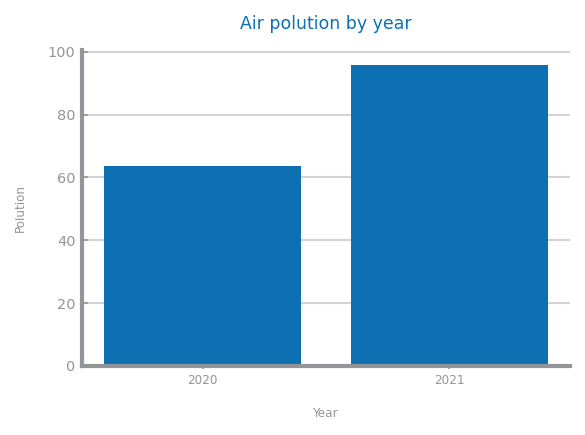

In [263]:
plt.title('Air polution by year', pad=10.0)
plt.ylabel('Polution', labelpad=10.0)
plt.xlabel('Year', labelpad=10.0)
plt.bar(years.keys(), years.values())
plt.tight_layout()
plt.show()
plt.close()

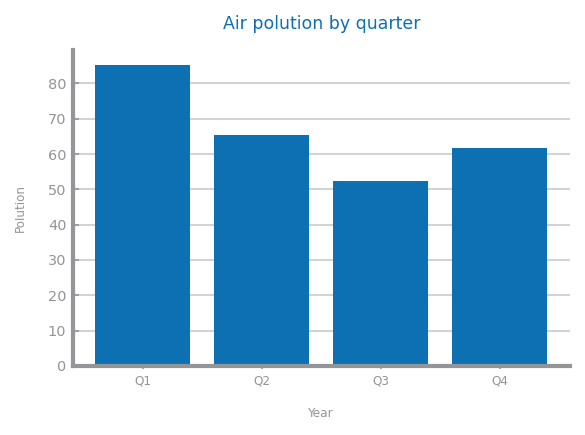

In [264]:
plt.title('Air polution by quarter', pad=10.0)
plt.ylabel('Polution', labelpad=10.0)
plt.xlabel('Year', labelpad=10.0)
plt.bar(quarters.keys(), quarters.values())
plt.tight_layout()
plt.show()
plt.close()

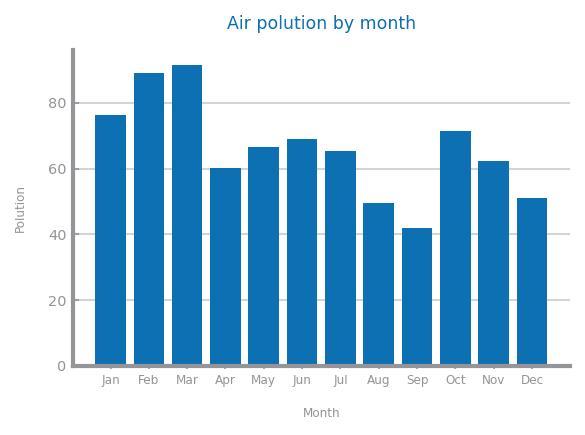

In [265]:
plt.title('Air polution by month', pad=10.0)
plt.ylabel('Polution', labelpad=10.0)
plt.xlabel('Month', labelpad=10.0)
plt.bar(months.keys(), months.values())
plt.tight_layout()
plt.show()
plt.close()

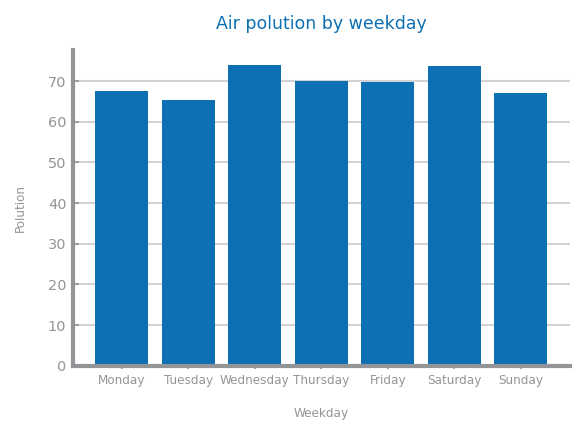

In [266]:
plt.title('Air polution by weekday', pad=10.0)
plt.ylabel('Polution', labelpad=10.0)
plt.xlabel('Weekday', labelpad=10.0)
plt.bar(weekdays.keys(), weekdays.values())
plt.tight_layout()
plt.show()
plt.close()

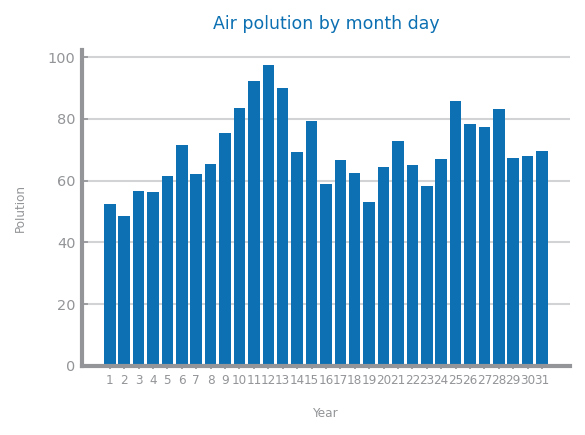

In [267]:
plt.title('Air polution by month day', pad=10.0)
plt.ylabel('Polution', labelpad=10.0)
plt.xlabel('Year', labelpad=10.0)
plt.bar(days.keys(), days.values())
plt.tight_layout()
plt.show()
plt.close()

In [268]:
values = {'nr records': df_tabular.shape[0], 'nr variables': df_tabular.shape[1]}
values

{'nr records': 169273, 'nr variables': 32}

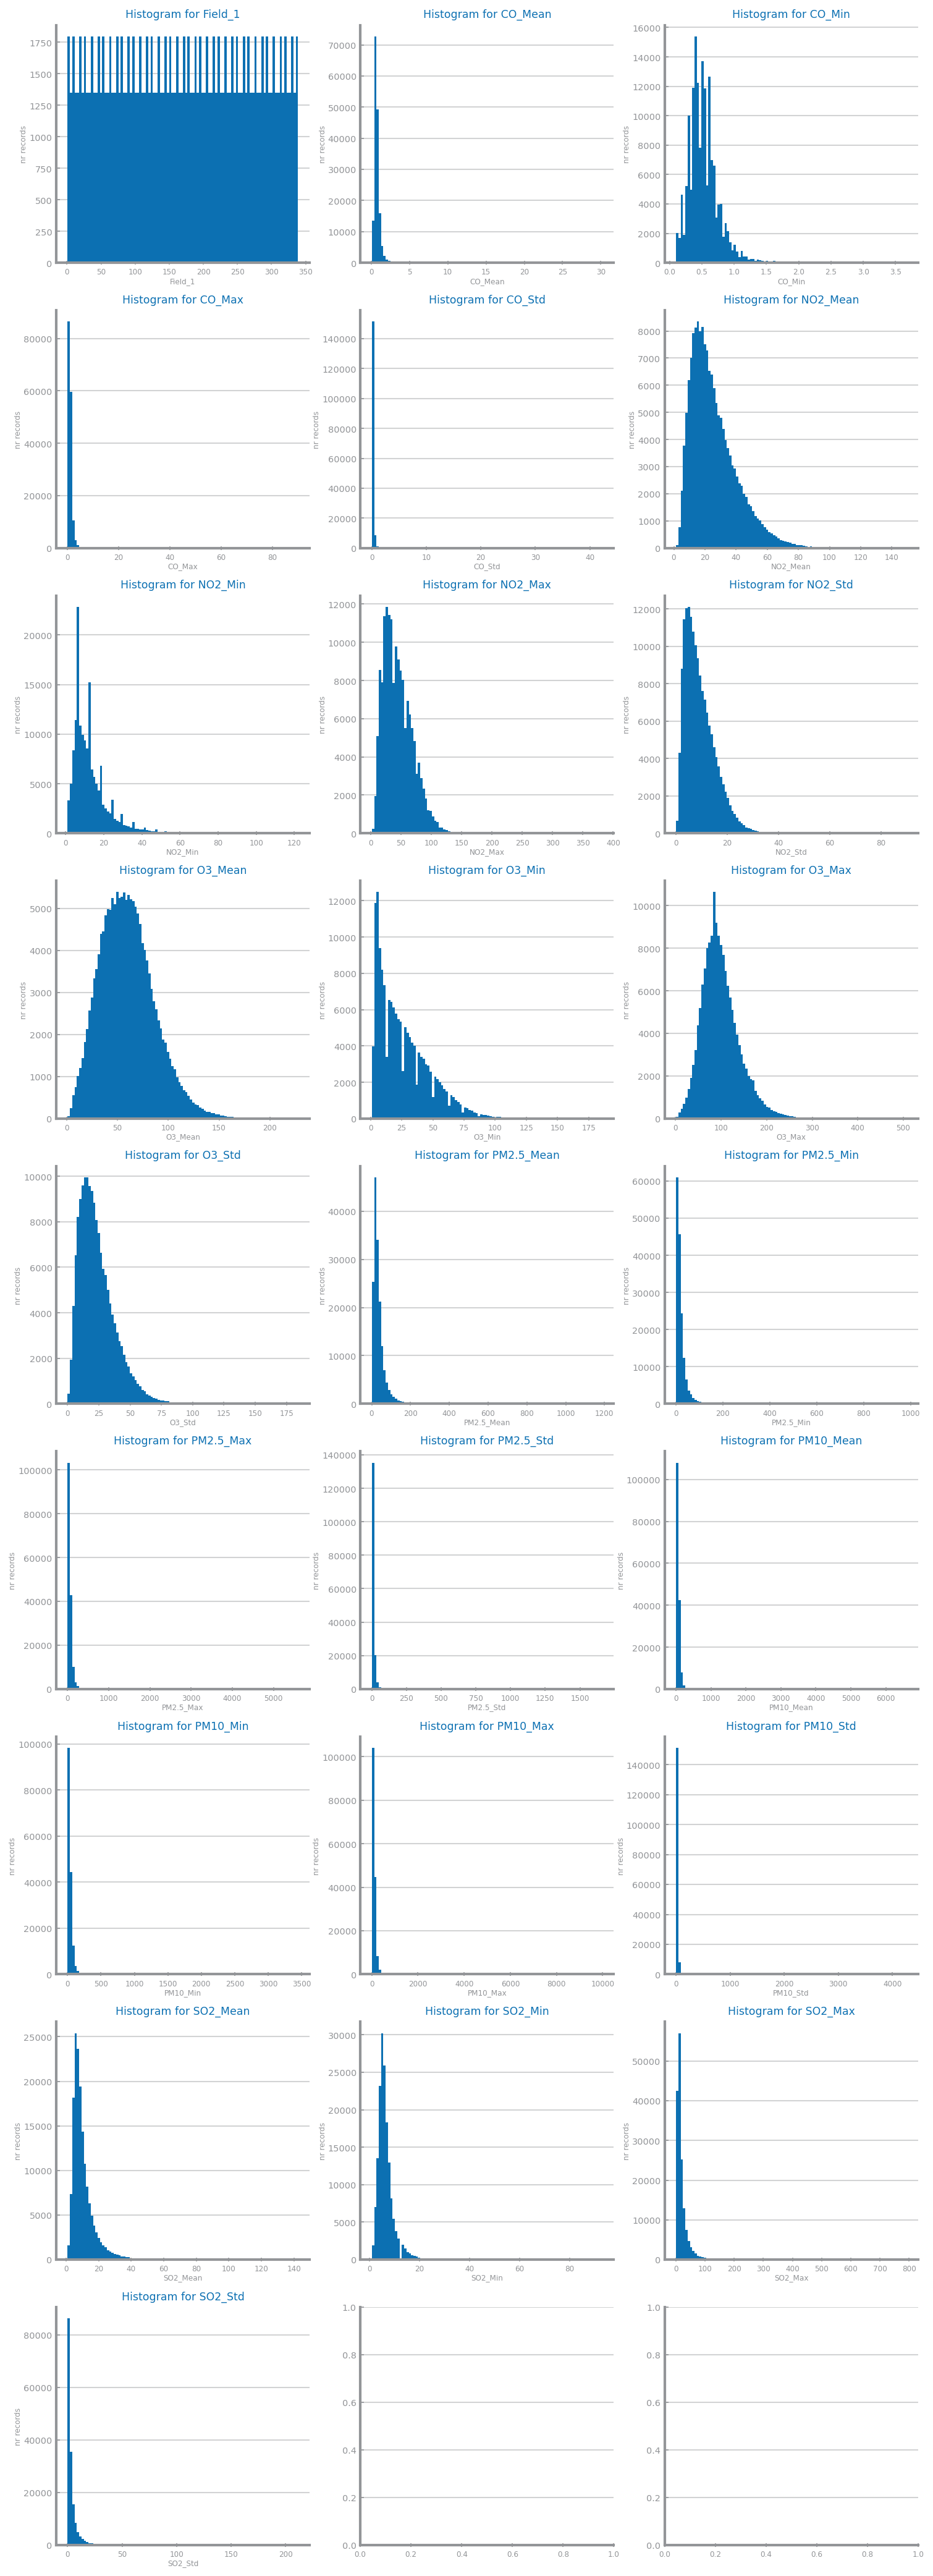

In [269]:
variables = get_variable_types(df_tabular)['Numeric']
if [] == variables:
    raise ValueError('There are no numeric variables.')

rows, cols = choose_grid(len(variables))
fig, axs = plt.subplots(rows, cols, figsize=(cols*HEIGHT, rows*HEIGHT), squeeze=False)
i, j = 0, 0
for n in range(len(variables)):
    axs[i, j].set_title('Histogram for %s'%variables[n])
    axs[i, j].set_xlabel(variables[n])
    axs[i, j].set_ylabel('nr records')
    axs[i, j].hist(df_tabular[variables[n]].values, bins=100)
    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)
# savefig('images/granularity_single.png')
plt.show()

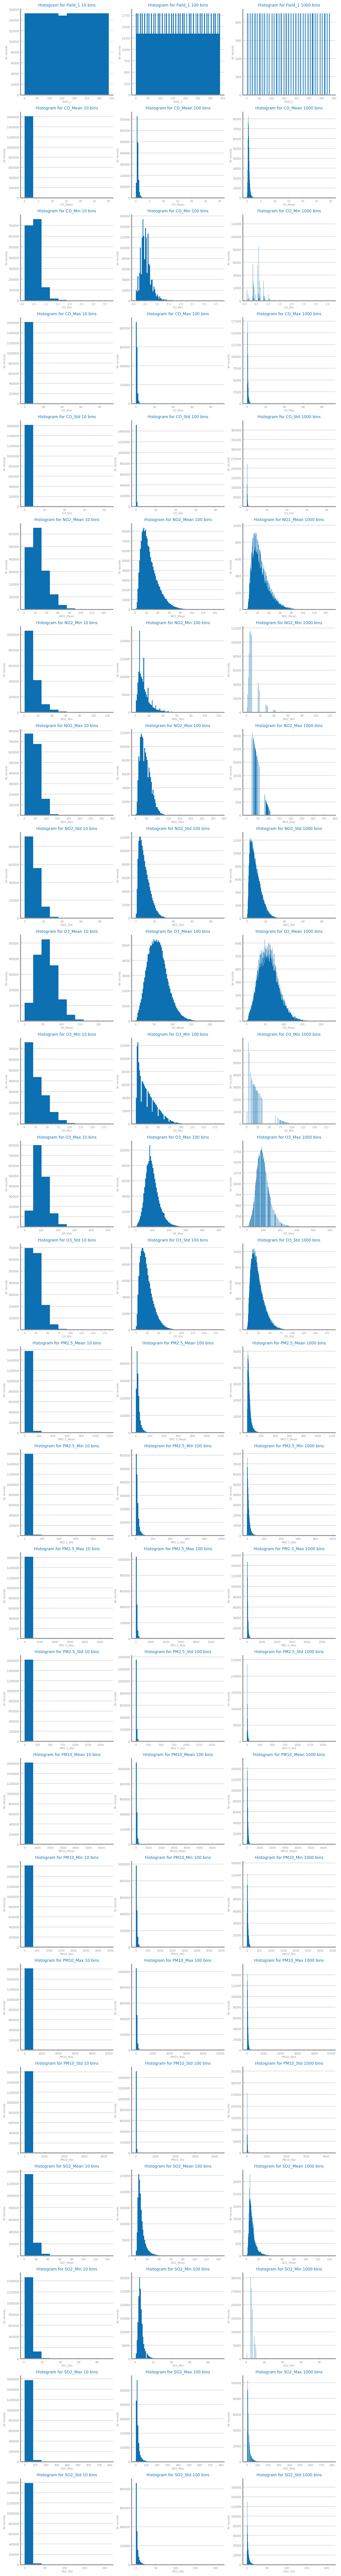

In [270]:
variables = get_variable_types(df_tabular)['Numeric']
if [] == variables:
    raise ValueError('There are no numeric variables.')

rows = len(variables)
bins = (10, 100, 1000)
cols = len(bins)
fig, axs = plt.subplots(rows, cols, figsize=(cols*HEIGHT, rows*HEIGHT), squeeze=False)
for i in range(rows):
    for j in range(cols):
        axs[i, j].set_title('Histogram for %s %d bins'%(variables[i], bins[j]))
        axs[i, j].set_xlabel(variables[i])
        axs[i, j].set_ylabel('Nr records')
        axs[i, j].hist(df_tabular[variables[i]].values, bins=bins[j])
# savefig('images/granularity_study.png')
plt.show()